#  <span style="color:blue">Evaluating Regression Models 

First things first, wrote the setting

In [5]:
import pandas as pd
import numpy as np
import os
from env import hostname, user, password


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import wrangle as w
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## <span style="color:blue">1.Load your zillow dataset.

### ACQUIRE

In [2]:
#now we have the makings of a character from real life and now we need to  adjust him to our story
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [5]:
#let's modify a couple of things to make his strong points stand out most
df = wrangle.wrangled_zillow(df)

In [6]:
df = wrangle.prep_zillow(df)

In [7]:
train, validate, test = wrangle.split_zillow(df)

In [8]:
print(f"train: {train.shape}")
print(f"validate: {validate.shape}")
print(f"test: {test.shape}")

train: (1247700, 7)
validate: (415900, 7)
test: (415900, 7)


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of home_value using only sqft.



## <span style="color:blue">2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of home value using only calfulatedfinishedsqft.

In [18]:
y=train[["home_value"]] #what we want
x=train[["sqft"]] #how we measure
# I had flipped the values and added double brackets

In [19]:
X_train = train[['sqft']]
y_train = train['home_value']

X_validate = validate[['sqft']]
y_validate = validate['home_value']

X_test = test[['sqft']]
y_test = test['home_value']

In [20]:
X_train.head()

,sqft
959590,1227.0
95483,1210.0
603772,1663.0
1019579,1198.0
219045,1433.0


In [21]:
y_train

959590     460640.0
95483      181930.0
603772     647102.0
1019579    329956.0
219045     481000.0
             ...   
1741363    221983.0
1416783    350261.0
1787437    348010.0
1348838    352919.0
1835135    230853.0
Name: home_value, Length: 1247700, dtype: float64

Need to turn these into one dimensional arrays

In [22]:
# assuming X and y are already defined
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

## Plot linear regression models

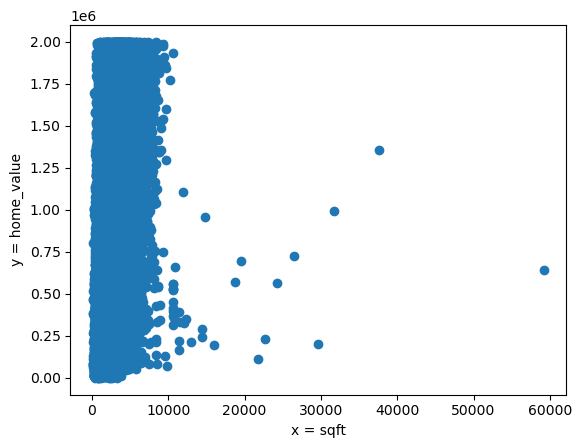

In [23]:
# look at scatter of x vs y
plt.scatter(x, y)
plt.xlabel('x = sqft')
plt.ylabel('y = home_value');

Scatterplot shows outliers houses of 20k calculated finished square feet

In [24]:
baseline = y.mean()
baseline

home_value    399585.912669
dtype: float64

In [25]:
train['baseline'] = y.mean()
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips,baseline
959590,3.0,2.0,1227.0,460640.0,1944.0,5557.64,6037.0,NaN
95483,2.0,1.0,1210.0,181930.0,1967.0,2331.60,6059.0,NaN
603772,4.0,2.0,1663.0,647102.0,1978.0,6832.28,6111.0,NaN
1019579,4.0,2.0,1198.0,329956.0,1955.0,4155.02,6037.0,NaN
219045,3.0,2.0,1433.0,481000.0,1956.0,7138.81,6037.0,NaN


In [26]:
baseline = train.home_value.mean()
baseline

399585.9126689108

In [27]:
train['baseline'] = train.home_value.mean()
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips,baseline
959590,3.0,2.0,1227.0,460640.0,1944.0,5557.64,6037.0,399585.912669
95483,2.0,1.0,1210.0,181930.0,1967.0,2331.60,6059.0,399585.912669
603772,4.0,2.0,1663.0,647102.0,1978.0,6832.28,6111.0,399585.912669
1019579,4.0,2.0,1198.0,329956.0,1955.0,4155.02,6037.0,399585.912669
219045,3.0,2.0,1433.0,481000.0,1956.0,7138.81,6037.0,399585.912669


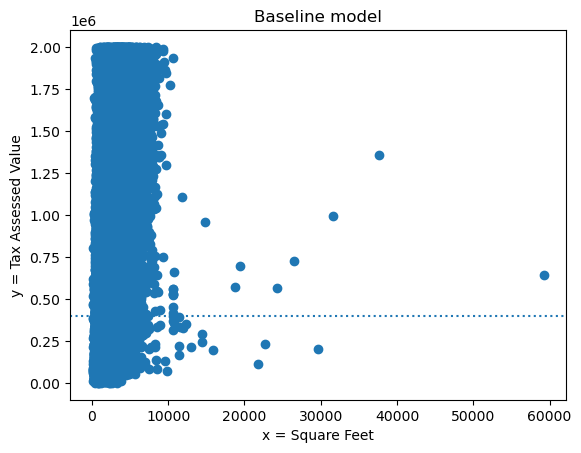

In [13]:
plt.scatter(train.sqft, train.home_value)
plt.axhline(train.home_value.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model');

Scatterplot shows outliers houses of 20k square feet

In [30]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [31]:
train['yhat'] = predictions

In [32]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips,baseline,yhat
959590,3.0,2.0,1227.0,460640.0,1944.0,5557.64,6037.0,399585.912669,266915.597404
95483,2.0,1.0,1210.0,181930.0,1967.0,2331.60,6059.0,399585.912669,262978.213096
603772,4.0,2.0,1663.0,647102.0,1978.0,6832.28,6111.0,399585.912669,367897.924360
1019579,4.0,2.0,1198.0,329956.0,1955.0,4155.02,6037.0,399585.912669,260198.882996
219045,3.0,2.0,1433.0,481000.0,1956.0,7138.81,6037.0,399585.912669,314627.430782


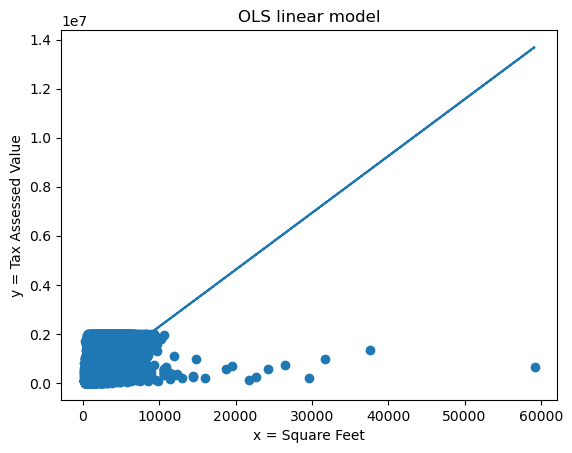

In [33]:
# visualize the line of best fit from OLS linear model
plt.scatter(train.sqft, train.home_value)
plt.plot(train.sqft, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

## <span style="color:blue">3. Plot the residuals for the linear regression model that you made.

In [3]:
train.head()

NameError: name 'train' is not defined

In [4]:
# residual = actual - predicted
train['residual'] = train.home_value - train.yhat
train['baseline_residual'] = train.home_value - train.baseline

NameError: name 'train' is not defined

In [36]:
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips,baseline,yhat,residual,baseline_residual
959590,3.0,2.0,1227.0,460640.0,1944.0,5557.64,6037.0,399585.912669,266915.597404,193724.402596,61054.087331
95483,2.0,1.0,1210.0,181930.0,1967.0,2331.60,6059.0,399585.912669,262978.213096,-81048.213096,-217655.912669
603772,4.0,2.0,1663.0,647102.0,1978.0,6832.28,6111.0,399585.912669,367897.924360,279204.075640,247516.087331
1019579,4.0,2.0,1198.0,329956.0,1955.0,4155.02,6037.0,399585.912669,260198.882996,69757.117004,-69629.912669
219045,3.0,2.0,1433.0,481000.0,1956.0,7138.81,6037.0,399585.912669,314627.430782,166372.569218,81414.087331


Negative Residual = Prediction  high the actual observed value is lower than the predicted value. In other words, the prediction is higher than the actual value. This indicates that the model has overestimated the target variable.
<br>
Positive Residual = Prediction too low

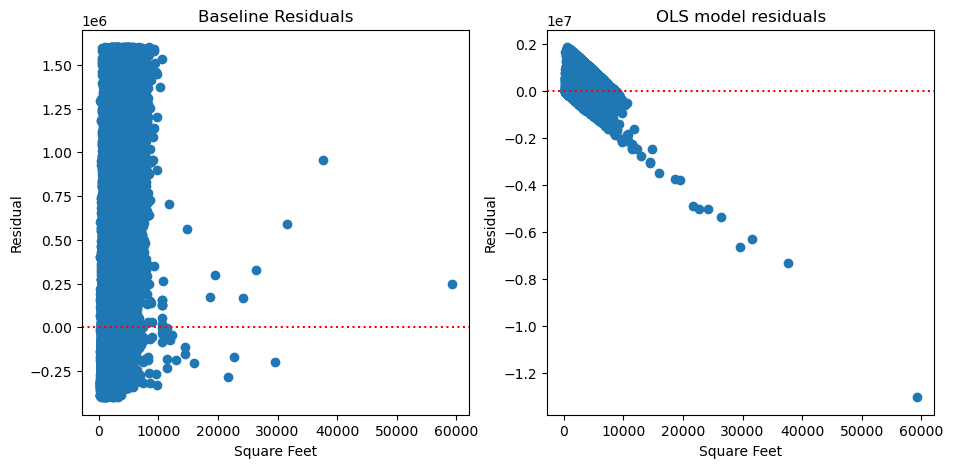

In [37]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.sqft, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.sqft, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [38]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

In [39]:
residual_min, residual_max

(-13053680.136728726, 1871707.400305576)

TypeError: 'float' object is not callable

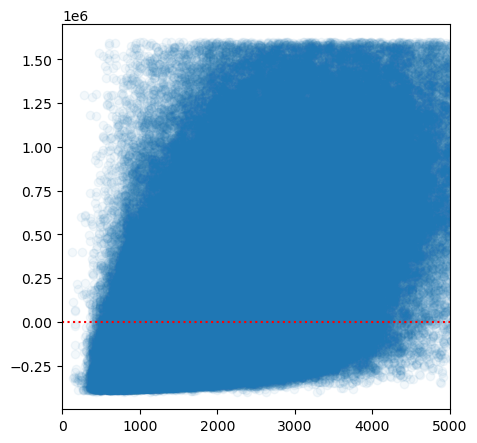

In [62]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.sqft, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlim(0,5000)
plt.ylim(baseline_residual_min().astype(np.int64), baseline_residual.max().astype(np.int64))
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.sqft, train.residual, alpha=0.05)
plt.axhline(y = 0, ls = ':', color ='red')
# plt.xlim(0,5000)
# plt.ylim(-1_000_000, residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
print("Negative Residual = Prediction too high")
print("Positive Residual = Prediction too low")

## FINDINGS
- Residual plot slope implies need for more predictors.

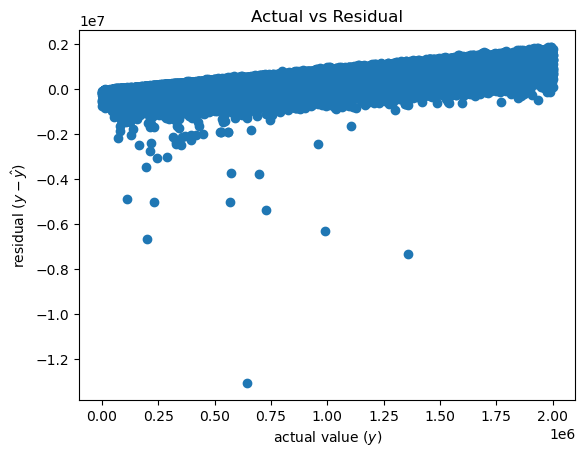

In [42]:
# Residual plot (y vs residual)
actual = train.home_value
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

## <span style="color:blue">4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [43]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,sale_tax,fips,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
959590,3.0,2.0,1227.0,460640.0,1944.0,5557.64,6037.0,399585.912669,266915.597404,193724.402596,61054.087331,3.752914e+10,3.727602e+09
95483,2.0,1.0,1210.0,181930.0,1967.0,2331.60,6059.0,399585.912669,262978.213096,-81048.213096,-217655.912669,6.568813e+09,4.737410e+10
603772,4.0,2.0,1663.0,647102.0,1978.0,6832.28,6111.0,399585.912669,367897.924360,279204.075640,247516.087331,7.795492e+10,6.126421e+10
1019579,4.0,2.0,1198.0,329956.0,1955.0,4155.02,6037.0,399585.912669,260198.882996,69757.117004,-69629.912669,4.866055e+09,4.848325e+09
219045,3.0,2.0,1433.0,481000.0,1956.0,7138.81,6037.0,399585.912669,314627.430782,166372.569218,81414.087331,2.767983e+10,6.628254e+09


<b>
    Calculating SSE
</b>

In [44]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 81107635295940752.0
SSE Baseline = 122860003912203680.0


In [45]:
SSE < SSE_baseline

True

## <span style="color:blue">5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average home value amount).

<b>
    
Calculating MSE

</b>

In [46]:
len(train)
train.shape[0]

1247700

In [47]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  65005718759.3
MSE baseline =  98469186432.8


<b>
    
Calculating RMSE

</b>

In [48]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  254962.2
RMSE baseline =  313798.0


##  <span style="color:blue">6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [49]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

OLS Regression Model Performs Better than Baseline


##  <span style="color:blue">7. What is the amount of variance explained in your model?

In [50]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = train['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = train['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.3398369468236332

In [51]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(train.home_value, train.yhat)

0.3398369468236332

##  <span style="color:blue">8. Is your model better than the baseline model?

In [54]:
X2 = sm.add_constant(train.sqft)
est = sm.OLS(train.home_value, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             home_value   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 6.423e+05
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:29:49   Log-Likelihood:            -1.7303e+07
No. Observations:             1247700   AIC:                         3.461e+07
Df Residuals:                 1247698   BIC:                         3.461e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.727e+04    568.022    -30.405      0.0

The OLS Regression Model outperformed the baseline model on the test set using RMSE as the evaluation metric. The RMSE for the OLS Regression Model was 272,306.6, while the baseline model had an RMSE of 313,748.0.

Despite the improvement over the baseline, the OLS Regression Model still does a poor job of accurately predicting home prices. The level of error, with a difference of hundreds of thousands of dollars, would be considered unacceptable for any buyer or seller relying on accurate price estimates.




##  <span style="color:blue">9. Create a file named evaluate.py that contains the following functions.

In [55]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [1]:

def residuals(actual, predicted):
    return actual - predicted

def SSE(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def MSE(actual, predicted):
    n = actual.shape[0]
    return SSE(actual, predicted) / n

def RMSE(actual, predicted):
    return math.sqrt(MSE(actual, predicted))

def ESS(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def TSS(actual):
    return ((actual - actual.mean()) ** 2).sum()

def R2_score(actual, predicted):
    return ess(actual, predicted) / TSS(actual)


In [2]:
def regression_errors(actual, predicted):
    return pd.Series({
        'SSE': SSE(actual, predicted),
        'ess': ess(actual, predicted),
        'TSS': TSS(actual),
        'MSE': MSE(actual, predicted),
        'RMSE': RMSE(actual, predicted),
   })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'SSE': SSE(actual, predicted),
        'MSE': MSE(actual, predicted),
        'RMSE': RMSE(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    RMSE_baseline = RMSE(actual, actual.mean())
    RMSE_model = RMSE(actual, predicted)
    return RMSE_model < RMSE_baseline